# Newton's method using variational equations

In [1]:
import rebound
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def simple(x):
    a, e = x
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(primary=sim.particles[0],m=1e-3, a=1, inc=0.1)
    sim.add(primary=sim.particles[0],m=1e-3, a=a, e=e)
    sim.integrate(1.)
    return np.array((sim.particles[2].x,sim.particles[2].y))
fp_true = simple((1.7,0.1))

In [3]:
def evaluate(x):
    a, e = x
    if (e<0):
        e=0.
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(primary=sim.particles[0],m=1e-3, a=1, inc=0.1)
    sim.add(primary=sim.particles[0],m=1e-3, a=a, e=e)

    var_da    = sim.add_variational()
    var_dda   = sim.add_variational(order=2,index_1st_order_a=var_da,index_1st_order_b=var_da)
    var_de    = sim.add_variational()
    var_dde   = sim.add_variational(order=2,index_1st_order_a=var_de,index_1st_order_b=var_de)
    var_da_de = sim.add_variational(order=2,index_1st_order_a=var_da,index_1st_order_b=var_de)
    sim._particles[var_da+2]    = rebound.Particle(simulation=sim,primary=sim.particles[0],a=a,m=1e-3,e=e,variation="a")
    sim._particles[var_de+2]    = rebound.Particle(simulation=sim,primary=sim.particles[0],a=a,m=1e-3,e=e,variation="e")
    sim._particles[var_dda+2]   = rebound.Particle(simulation=sim,primary=sim.particles[0],a=a,m=1e-3,e=e,variation="a",variation_order=2)
    sim._particles[var_dde+2]   = rebound.Particle(simulation=sim,primary=sim.particles[0],a=a,m=1e-3,e=e,variation="e",variation_order=2)
    print sim._particles[var_dde+2]
    sim._particles[var_da_de+2] = rebound.Particle(simulation=sim,primary=sim.particles[0],a=a,m=1e-3,e=e,variation="a",variation2="e",variation_order=2)

    sim.integrate(1.)
    
    fp = np.array((sim.particles[2].x,sim.particles[2].y))
    fp_da = np.array((sim.particles[var_da+2].x,sim.particles[var_da+2].y))
    fp_dda = 2.*np.array((sim.particles[var_dda+2].x,sim.particles[var_dda+2].y))
    fp_de = np.array((sim.particles[var_de+2].x,sim.particles[var_de+2].y))
    fp_dde = 2.*np.array((sim.particles[var_dde+2].x,sim.particles[var_dde+2].y))
    fp_da_de = 2.*np.array((sim.particles[var_da_de+2].x,sim.particles[var_da_de+2].y))    
    
    L = np.sqrt(np.dot(fp - fp_true,fp - fp_true))
    
    dL_da = np.dot(fp_da, (fp-fp_true)/L)
    dL_de = np.dot(fp_de, (fp-fp_true)/L)
    
    dL_dda = np.dot(fp_dda, (fp-fp_true)/L) + np.dot(fp_da,fp_da)/L - dL_da*dL_da/L
    dL_dde = np.dot(fp_dde, (fp-fp_true)/L) + np.dot(fp_de,fp_de)/L - dL_de*dL_de/L
    dL_da_de = np.dot(fp_da_de, (fp-fp_true)/L) + np.dot(fp_da,fp_de)/L - dL_da*dL_de/L
                     
    return L, np.array((dL_da,dL_de)), np.array(((dL_dda,dL_da_de),(dL_da_de,dL_dde)))

In [4]:
x = np.array((3.698, 0.105))
N_it = 10
chain = np.zeros((N_it,2))
for i in range(N_it):    
    f, df, ddf = evaluate(x)
    Delta_x = -np.dot(np.linalg.inv(ddf),df)
    Delta_x = np.array((-df[0]/ddf[0][0],0))
    #Delta_x = - np.array((1./ddf[0][0]*df[0],0))
    #Delta_x = - np.array((0.,1./ddf[1][1]*df[1]))
    
    chain[i] = (f, x[0])
    
    x = x + 0.01*Delta_x
    


<rebound.Particle object, id=0 m=0.0 x=0.0 y=0.0 z=0.0 vx=-0.0 vy=0.715184264149 vz=0.0>
<rebound.Particle object, id=0 m=0.0 x=0.0 y=0.0 z=0.0 vx=-0.0 vy=0.687707594567 vz=0.0>
<rebound.Particle object, id=0 m=0.0 x=0.0 y=0.0 z=0.0 vx=-0.0 vy=0.654352459581 vz=0.0>
<rebound.Particle object, id=0 m=0.0 x=0.0 y=0.0 z=0.0 vx=-0.0 vy=0.611658408892 vz=0.0>
<rebound.Particle object, id=0 m=0.0 x=0.0 y=0.0 z=0.0 vx=-0.0 vy=0.552129636168 vz=0.0>
<rebound.Particle object, id=0 m=0.0 x=0.0 y=0.0 z=0.0 vx=-0.0 vy=0.455624449378 vz=0.0>
<rebound.Particle object, id=0 m=0.0 x=0.0 y=0.0 z=0.0 vx=-0.0 vy=0.254229763167 vz=0.0>


ValueError: Unbound orbit (a < 0) must have e > 1.

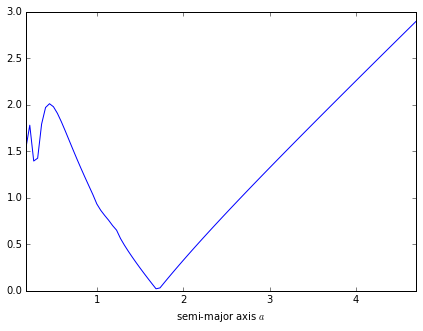

In [9]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
extent = [min(grid_a),max(grid_a)]
ax.set_xlim(extent[0],extent[1])
ax.set_xlabel("semi-major axis $a$")
ax.plot(grid_a,grid)
#ax.plot(grid_a,grid_da)
#ax.plot(chain[:,0],chain[:,1])
#ax.plot(chain[:,0],chain[:,1],"ro",color="blue")
#ax.plot(chain[0,0],chain[0,1],"ro")


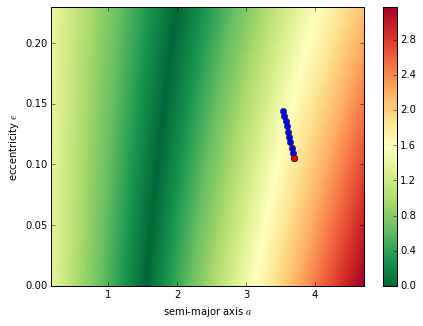

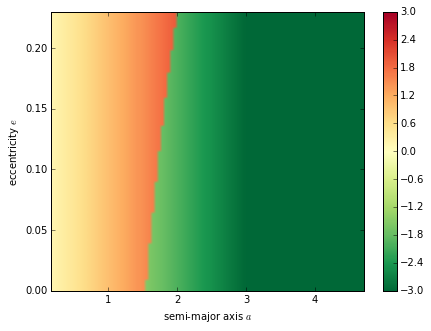

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
extent = [min(grid_a),max(grid_a),min(grid_e),max(grid_e)]
ax.set_xlim(extent[0],extent[1])
ax.set_xlabel("semi-major axis $a$")
ax.set_ylim(extent[2],extent[3])
ax.set_ylabel("eccentricity $e$")
im = ax.imshow(grid, cmap="RdYlGn_r", origin="lower", aspect='auto', extent=extent) #interpolation="none",
ax.plot(chain[:,0],chain[:,1])
ax.plot(chain[:,0],chain[:,1],"ro",color="blue")
ax.plot(chain[0,0],chain[0,1],"ro")
cb = plt.colorbar(im, ax=ax)

fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
extent = [min(grid_a),max(grid_a),min(grid_e),max(grid_e)]
ax.set_xlim(extent[0],extent[1])
ax.set_xlabel("semi-major axis $a$")
ax.set_ylim(extent[2],extent[3])
ax.set_ylabel("eccentricity $e$")
im = ax.imshow(grid_grad_a, cmap="RdYlGn_r", vmin=-3, vmax=3,origin="lower", aspect='auto', extent=extent) #interpolation="none",
cb = plt.colorbar(im, ax=ax)

In [7]:
N=100
grid = np.zeros((N))
grid_da = np.zeros((N))
grid_a = np.linspace(.1695,4.705,N)
#grid_e = np.linspace(0.,0.23,N)
for i, a in enumerate(grid_a):
    #for j, e in enumerate(grid_e):
    fp, fp_da = simple_grad((a,0.1))
    L = np.sqrt(np.dot(fp - fp_true,fp - fp_true))
    dL_da = np.dot(fp_da, (fp-fp_true)/L)
    grid[i] = L
    grid_da[i] = dL_da
#        grid_grad_a[j][i] = dL_da

In [6]:
def simple_grad(x):
    a, e = x
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(primary=sim.particles[0],m=1e-3, a=1, inc=0.1)
    sim.add(primary=sim.particles[0],m=1e-3, a=a, e=e)
    var_da    = sim.add_variational()
    vp_da    = rebound.Particle(simulation=sim,primary=sim.particles[0],a=a,m=1e-3,e=e,variation="a")
    sim._particles[var_da+2]    = vp_da

    sim.integrate(1.)
    return np.array((sim.particles[2].x,sim.particles[2].y)),np.array((sim.particles[var_da+2].x,sim.particles[var_da+2].y))
